In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t as tdist
import scipy.stats as stats
from statsmodels.stats.outliers_influence import summary_table
get_ipython().magic(u'matplotlib inline')
from statsmodels.sandbox.regression.predstd import wls_prediction_std as pi

/Users/sahiljain/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.getcwd()

'/Users/sahiljain'

In [3]:
os.chdir("/Users/sahiljain/Desktop/Linear Regression /")

In [4]:
ForestData = pd.read_csv('forestry.csv')

In [5]:
# Initializing the variables (response and dependent)

In [6]:
y = ForestData["area"]
x1 = ForestData["height"]
x2 = ForestData["caliper"]
x3 = ForestData["htcal"]

In [7]:
# (A) Fit a multiple linear model realting to area to the three 
# explanatory variables listed above and construct the following residuls
# plot : 
# (i) Studentized Residuals vs Index 
# (ii) Studentized Residuals vs Fitted Values
# (iii) histogram of Studentized residuals
# (iv) QQ-Plot of Studentized Residuals 

In [8]:
# Multiple Linear Regression model with area as response variable.
lm = smf.ols('y ~ x1 + x2 + x3', data = ForestData)
model1 = lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     74.14
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           3.08e-14
Time:                        19:39:11   Log-Likelihood:                -153.77
No. Observations:                  35   AIC:                             315.5
Df Residuals:                      31   BIC:                             321.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.1765     55.096     -0.602      0.551    -145.545      79.192
x1             3.7354      1.952      1.914      0.065      -0.245       7.716
x2           -74.1170    114.012     -0.650      0.520    -306.647     158.413
x3             2.2343      3.539      0.631      0.532      -4.983       9.451
==============================================================================
Omnibus:                        8.550   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.088
Skew:                           0.604   Prob(JB):                      0.00645
Kurtosis:                       5.337   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Manually Calculating for studetized residuals 
n = ForestData.shape[0]
p = ForestData.shape[1]-1
sigma_hat_1 = np.sqrt(model1.scale) # sigma hat
X_1 = np.array([np.repeat(1,n), x1, x2, x3]).transpose() # X matrix
H_1 = np.matmul(np.matmul(X_1, np.linalg.inv(np.matmul(X_1.transpose(), X_1))),
                X_1.transpose()) # Hat Matrix
h_1 = np.diag(H_1)
st_resid_1 = model1.resid/(sigma_hat_1*np.sqrt(1-h_1))

(1, 35)

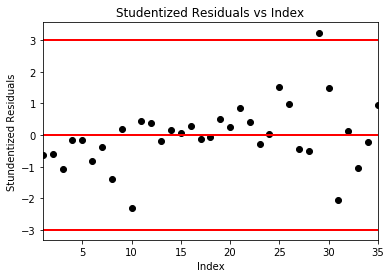

In [10]:
# PLOTS : 
# (i) Studentized residuals vs Index
n = len(model1.resid)
index = np.linspace(1,n,n)
plt.figure()
plt.scatter(x = index, y = st_resid_1, color = "black")
plt.xlabel("Index")
plt.ylabel("Stundentized Residuals")
plt.title("Studentized Residuals vs Index")
plt.hlines(y = 0, xmin = 1, xmax = n, color = "red", linewidth = 2)
plt.hlines(y = 3, xmin = 1, xmax = n, color = "red", linewidth = 2)
plt.hlines(y = -3, xmin = 1, xmax = n, color = "red", linewidth = 2)
plt.xlim(1,n)

(11.625771928764683, 185.20982607241177)

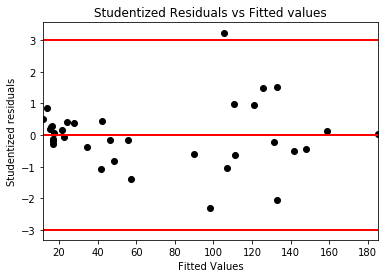

In [11]:
#(ii) Studentized residuals vs Fitted values
plt.figure()
plt.scatter(x = model1.fittedvalues, y = st_resid_1, color = "black")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized residuals")
plt.title("Studentized Residuals vs Fitted values")
plt.hlines(y = 0, xmin = np.min(model1.fittedvalues), 
          xmax = np.max(model1.fittedvalues), color = "red",
          linewidth = 2)
plt.hlines(y = 3, xmin = np.min(model1.fittedvalues), 
          xmax = np.max(model1.fittedvalues), color = "red",
          linewidth = 2)
plt.hlines(y = -3, xmin = np.min(model1.fittedvalues), 
          xmax = np.max(model1.fittedvalues), color = "red",
          linewidth = 2)
plt.xlim(np.min(model1.fittedvalues), np.max(model1.fittedvalues))

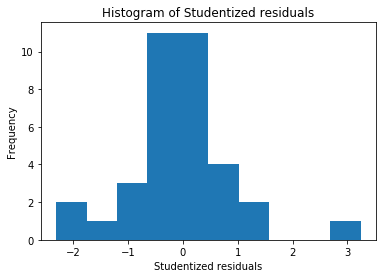

In [12]:
#(iii) Histogram of studentized residuals
plt.hist(st_resid_1)
plt.title("Histogram of Studentized residuals")
plt.xlabel("Studentized residuals")
plt.ylabel("Frequency")

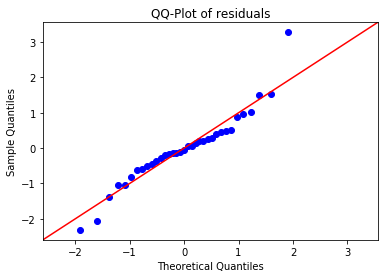

In [13]:
#(iv) QQ-Plot of the studentized residuals 
sm.qqplot(st_resid_1, dist = "norm", fit = True, line = '45')
plt.title("QQ-Plot of residuals")

In [14]:
#(B) Based on the plots in (a), answer “Yes” or “No” to the following 
# questions and give a one sentence justification.

# (i) Do the residuals appear to be independent ? 
# Yes, the residuals appear to be independent in case of Index vs 
# Studentized residuals and in case of the histogram of the studentized 
# residuals. 

# (ii) Do the residuals appear to have constant variance. 
# No, If we look at the plot of Studentized residuals vs Fitted values 
# the residuals appear to have follow a pattern which means that they do 
# not have constant variance. 

# (iii) Do the residuals appear to be nornally distributed ? 
# No, the residuals do not appear to be normally distributed because 
# QQ-Plot gives an evidence of heavy tailed (right skewed) Distribution. 

# (iv) Do the residuals suggest existance of an outlier. 
# Yes, the reiduals do suggest an existance of an outlier becuase if we 
# look at the plots the histogram is normally distibuted where as QQ-Plot 
# and Fitted values appear to be dependent and thus giving a small idea 
# about the existance of an outlier. 

In [15]:
# (C) Which observation has the largest studentized residual ?
np.where(st_resid_1 > 3)

(array([28]),)

In [18]:
# From the code it appears like observation 29 has the largest studentized
# residual. 

In [19]:
# (D) Calculate the leverge for each observation and construst a plot of 
# them vs their index. Which observation have 'high' levarage (i.e., 
# leverage larger than twice the average leverage) ? 

In [20]:
h_1

array([ 0.44838774,  0.30870904,  0.10045117,  0.07821682,  0.07614714,
        0.05467466,  0.04703267,  0.07039175,  0.10129502,  0.15782718,
        0.06101001,  0.06332837,  0.08475604,  0.10160375,  0.05851252,
        0.14058356,  0.17481524,  0.07363143,  0.08240691,  0.06658612,
        0.07138849,  0.05336468,  0.08475604,  0.28433074,  0.07381084,
        0.06590437,  0.10324293,  0.09233541,  0.06103058,  0.08810671,
        0.12357671,  0.25651243,  0.13581279,  0.08286254,  0.0725976 ])

In [21]:
# Plot of Levarage vs Index

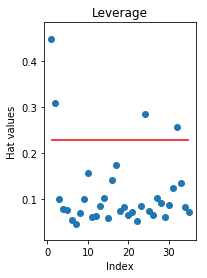

In [22]:
plt.figure()
plt.subplot(1,2,1)
plt.scatter(x = np.linspace(1,n,n), y = h_1)
plt.hlines(y = 2*np.mean(h_1), xmin = 1, xmax = n, color = "red")
plt.xlabel("Index")
plt.ylabel("Hat values")
plt.title("Leverage")

In [23]:
# Observation with high levarage 
np.where(h_1 > 2*np.mean(h_1))

(array([ 0,  1, 23, 31]),)

In [24]:
# Points with high leverages are 1,2,24,32. 

In [25]:
# (E)  Calculate Cook’s D-statistic for each observation and construct a 
# plot of them vs.their index. List the top three most influential points.

In [26]:
# Calculating cooks distance
D = (h_1*st_resid_1**2)/((1-h_1)*(p+1))

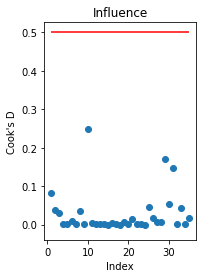

In [27]:
plt.subplot(1,2,2)
plt.scatter(x = np.linspace(1,n,n), y = D)
plt.hlines(y = 0.5, xmin = 1, xmax = n, color = "red")
plt.xlabel("Index")
plt.ylabel("Cook's D")
plt.title("Influence")

In [28]:
# List the top 3 most influential points
maxInfluence = sorted(range(len(D)), key = lambda i: D[i], 
                      reverse = True)[:3]
maxInfluence

[9, 28, 30]

In [28]:
# From the code it appears that observation 10, 29 and 31 have the highest
# influence

In [56]:
# (F) Repeat part (a) but with observation 10 and 29 deleted. 

In [29]:
# Deleting the observations
Forest_new = ForestData.drop(ForestData.index[[9,28]])

In [30]:
# Repeating part a first by initializing variables. 
y_2 = Forest_new["area"]
x_1_new = Forest_new["height"]
x_2_new = Forest_new["caliper"]
x_3_new = Forest_new["htcal"]

In [31]:
# Multiple Linear regression with the deleted observation 
lm = smf.ols('y_2 ~ x_1_new + x_2_new + x_3_new', data = Forest_new)
model2 = lm.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_2   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     126.3
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           9.59e-17
Time:                        19:42:08   Log-Likelihood:                -135.33
No. Observations:                  33   AIC:                             278.7
Df Residuals:                      29   BIC:                             284.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.6149     41.883     -0.516      0.610    -107.275      64.045
x_1_new        3.0181      1.474      2.048      0.050       0.004       6.032
x_2_new      -86.2375     87.225     -0.989      0.331    -264.633      92.158
x_3_new        3.1061      2.676      1.161      0.255      -2.368       8.580
==============================================================================
Omnibus:                        0.770   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.136
Skew:                           0.073   Prob(JB):                        0.934
Kurtosis:                       3.278   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Manually calculating new Studentized residual. 
n2 = len(model2.resid)
index = np.linspace(1,n2,n2)
sigma_hat_2 = np.sqrt(model2.scale)
X_2 = np.array([np.repeat(1,n2), x_1_new, x_2_new, x_3_new]).transpose()
H_2 = np.matmul(np.matmul(X_2, np.linalg.inv(np.matmul(X_2.transpose(), X_2))),
                X_2.transpose())
h_2 = np.diag(H_2)
st_resid_2 = model2.resid/(sigma_hat_2*np.sqrt(1-h_2))

(1, 33)

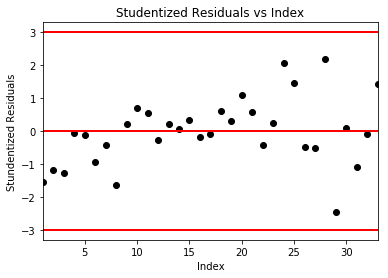

In [33]:
# (i) Studentized Residuals vs Index
n = len(model2.resid)
index = np.linspace(1,n,n)
plt.figure()
plt.scatter(x = index, y = st_resid_2, color = "black")
plt.xlabel("Index")
plt.ylabel("Stundentized Residuals")
plt.title("Studentized Residuals vs Index")
plt.hlines(y = 0, xmin = 1, xmax = n, color = "red", linewidth = 2)
plt.hlines(y = 3, xmin = 1, xmax = n, color = "red", linewidth = 2)
plt.hlines(y = -3, xmin = 1, xmax = n, color = "red", linewidth = 2)
plt.xlim(1,n)

(12.424564797265059, 182.83037708140603)

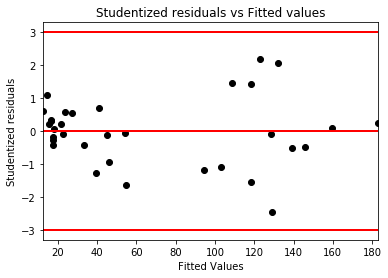

In [34]:
#(ii) Studentized residuals vs fitted values
plt.figure()
plt.scatter(x = model2.fittedvalues, y = st_resid_2, color = "black")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized residuals")
plt.title("Studentized residuals vs Fitted values")
plt.hlines(y = 0, xmin = np.min(model2.fittedvalues), 
           xmax = np.max(model2.fittedvalues), color = "red", 
           linewidth = 2)
plt.hlines(y = 3, xmin = np.min(model2.fittedvalues), 
           xmax = np.max(model2.fittedvalues), color = "red", 
           linewidth = 2)
plt.hlines(y = -3, xmin = np.min(model2.fittedvalues), 
           xmax = np.max(model2.fittedvalues),color = "red", 
           linewidth = 2)
plt.xlim(np.min(model2.fittedvalues), np.max(model2.fittedvalues))

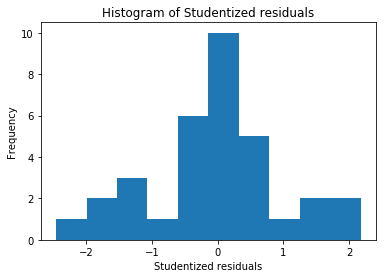

In [35]:
#(iii) Histogram of studenttized residuals
plt.hist(st_resid_2)
plt.title("Histogram of Studentized residuals")
plt.ylabel("Frequency")
plt.xlabel("Studentized residuals")

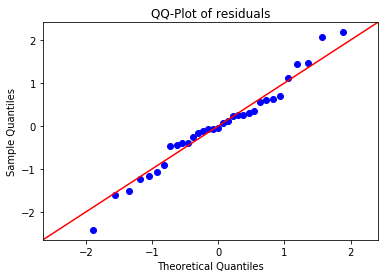

In [36]:
#(iv) QQ-Plot of the studentized residuals
sm.qqplot(st_resid_2, dist = "norm", fit = True, line = '45')
plt.title("QQ-Plot of residuals")

In [37]:
# (G)  Consider the plot of the Studentized Residuals vs. 
# Fitted Values from (f). Do these residuals appear to have constant 
# variance? Answer “Yes” or “No” with a

# No these residuals do not appear to have a constant variance because 
# these residuals follow a non-random pattern over fitted values giving 
# an evidence that residuals are dependent and thus do not have a 
# constant variance. 

In [38]:
# (H) Fit a multiple linear regression model relating log(area) 
# (i.e., the natural logarithm of area) to the three explanatory 
# variables, excluding observations 10 and 29 as you did in (f)

# First we will calculate the logrithmic value of the area and then a 
# MLR of log(area) as response variable with respect to new model with 
# observation 10 and 29 deleted. 

In [39]:
# Log of area
y_3 = np.log(y_2)

In [40]:
# Multiple linear regression 
lm = smf.ols('y_3 ~ x_1_new + x_2_new + x_3_new', data = Forest_new)
model3 = lm.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_3   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     145.9
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           1.37e-17
Time:                        19:42:20   Log-Likelihood:                 3.6540
No. Observations:                  33   AIC:                            0.6920
Df Residuals:                      29   BIC:                             6.678
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1716      0.621     -0.276      0.784      -1.441       1.098
x_1_new        0.1280      0.022      5.857      0.000       0.083       0.173
x_2_new        4.3961      1.293      3.400      0.002       1.752       7.040
x_3_new       -0.1156      0.040     -2.913      0.007      -0.197      -0.034
==============================================================================
Omnibus:                        1.604   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.252
Skew:                          -0.266   Prob(JB):                        0.535
Kurtosis:                       2.209   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# (I) Construct a plot of the studentized residuals vs Fitted values for 
# the model in the (h). Does it appear as though the log-transformation 
# has stabilized the variability of the residuals relative to what was 
# observed in (g) ? Which model - the one from (g) or the one from (h) - 
# do feel is the most appropriate ? 

# First we will again calculate the Studentized residuals of the new model,
# but this time we will only plot Studentized Residuals vs Fitted values 
# for the model.  

In [42]:
n = len(model3.resid)
index = np.linspace(1,n,n)
sigma_hat_3 = np.sqrt(model3.scale)
X_3 = np.array([np.repeat(1,n), x_1_new, x_2_new, x_3_new]).transpose()
H_3 = np.matmul(np.matmul(X_3, np.linalg.inv(np.matmul(X_3.transpose(), X_3))), 
               X_3.transpose())
h_3 = np.diag(H_3)
st_resid_3 = model3.resid/(sigma_hat_3*np.sqrt(1-h_3))

(2.7113607641308373, 5.3057135706287308)

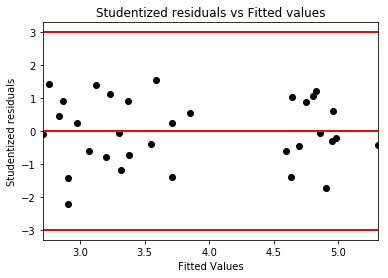

In [43]:
# Plot of the studentized residuals vs fitted values
plt.figure()
plt.scatter(x = model3.fittedvalues, y = st_resid_3, color = "black")
plt.xlabel("Fitted Values")
plt.ylabel("Studentized residuals")
plt.title("Studentized residuals vs Fitted values")
plt.hlines(y = 0, xmin = np.min(model3.fittedvalues), 
           xmax = np.max(model3.fittedvalues), color = "red", 
           linewidth = 2)
plt.hlines(y = 3, xmin = np.min(model3.fittedvalues), 
           xmax = np.max(model3.fittedvalues), color = "red", 
           linewidth = 2)
plt.hlines(y = -3, xmin = np.min(model3.fittedvalues), 
           xmax = np.max(model3.fittedvalues),color = "red", 
           linewidth = 2)
plt.xlim(np.min(model3.fittedvalues), np.max(model3.fittedvalues))

In [44]:
# Yes from the plot it looks like that the log transformation has 
# stablized the variabilityof the residuals related to what we observed 
# in part G. Out of the two models, the linear model with 
# log-transformation is seemingly more appropriate than the other, 
# even though both models excludes the outlier values, but still 
# Log-transformed model is more appropriate. 